In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('student.csv')
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.tail()

,Hours,Scores
23,6.9,76
24,7.8,86
25,4.5,58
26,5.3,50
27,3.4,40


In [26]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [27]:
df.shape

(28, 2)

In [28]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [29]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [30]:
x=df.iloc[:,:-1]
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [31]:
y=df.iloc[:,-1]
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
25    58
26    50
27    40
Name: Scores, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

,Hours
25,4.5
16,2.5
1,5.1
10,7.7
27,3.4
26,5.3
8,8.3
6,9.2
4,3.5
18,6.1


In [33]:
x_test

,Hours
2,3.2
22,3.8
14,1.1
17,1.9
5,1.5
11,5.9
24,7.8
13,3.3
20,2.7


In [34]:
y_train

25    58
16    30
1     47
10    85
27    40
26    50
8     81
6     88
4     30
18    67
19    69
9     25
7     60
23    76
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [35]:
y_test

2     27
22    35
14    17
17    24
5     20
11    62
24    86
13    42
20    30
Name: Scores, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

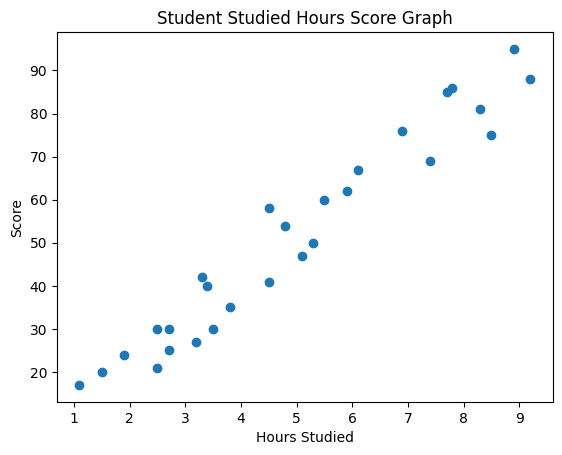

In [36]:
plt.scatter(x,y)
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Student Studied Hours Score Graph')
plt.tight_layout

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([33.6105596 , 39.46087402, 13.13445913, 20.93487835, 17.03466874,
       59.93697449, 78.46297016, 34.585612  , 28.73529758])

In [38]:
print(model.predict([[8.8]]))

[88.21349419]


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

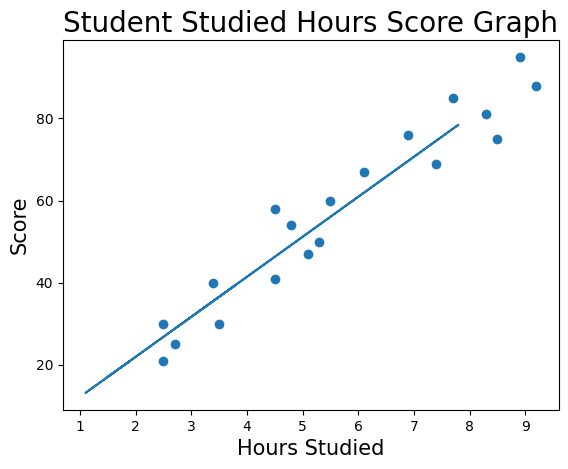

In [39]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred)
plt.xlabel('Hours Studied',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Student Studied Hours Score Graph',fontsize=20)
plt.tight_layout

In [40]:
print('Slope :',model.coef_)

Slope : [9.75052403]


In [41]:
print('Constant: ',model.intercept_)

Constant:  2.4088826868273046


In [42]:
df1=pd.DataFrame({'Actual value':y_test,'Predicted vale ':y_pred,'Difference':y_test-y_pred})
df1

,Actual value,Predicted vale,Difference
2,27,33.610560,-6.610560
22,35,39.460874,-4.460874
14,17,13.134459,3.865541
17,24,20.934878,3.065122
5,20,17.034669,2.965331
11,62,59.936974,2.063026
24,86,78.462970,7.537030
13,42,34.585612,7.414388
20,30,28.735298,1.264702


In [43]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,y_pred)
MAE

4.360730351633337

In [44]:
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.13502867645681496

In [46]:
MSE=mean_squared_error(y_test,y_pred)
MSE

23.818330702954892

In [47]:
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

4.880402719341396

In [48]:
score=r2_score(y_test,y_pred)
score

0.9470819905935777